## Cash 4 Life Analysis 

### Florida Lottery Cash4Life 

Cash4Life is a multi-state lottery game available in Florida and nine other states.  
It offers players the chance to win lifetime prizes, with drawings held daily at 9:00 PM ET.  

Rules and Gameplay Info can be found:  
https://floridalottery.com/games/draw-games/cash4life   

This notebook will analyze different key patterns and number frequencies for the Cash4Life Lotto Draw Game.  
In addition to the analysis, three different styles of Generated Gameplay Numbers will be created based off Best/Worst/Random transitions. 
Additional files (top 5 number combinations) are created in this notebook and saved to csv for additional analysis later if needed.  

### <span style= "color:green;"> **The Data**</span>  

*last notebook update- **2025/05/04***

**Imports, Read, and Data Info**

In [1]:
import pandas as pd
import random
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from prettytable import PrettyTable

In [2]:
data = pd.read_csv('../CSV/c4l_updated.csv')

In [3]:
data.head()

,Date,Day,1st,2nd,3rd,4th,5th,CB
0,05/02/2025,Friday,5,47,48,50,58,1
1,05/01/2025,Thursday,9,20,27,28,39,3
2,04/30/2025,Wednesday,8,9,43,55,59,1
3,04/29/2025,Tuesday,8,14,32,54,60,1
4,04/28/2025,Monday,1,8,13,33,52,4


In [4]:
data.tail()

,Date,Day,1st,2nd,3rd,4th,5th,CB
2374,03/06/2017,Monday,1,5,14,22,50,2
2375,03/02/2017,Thursday,3,7,11,30,42,3
2376,02/27/2017,Monday,6,19,28,57,60,1
2377,02/23/2017,Thursday,3,24,38,43,52,3
2378,02/20/2017,Monday,13,16,23,37,48,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2379 non-null   object
 1   Day     2379 non-null   object
 2   1st     2379 non-null   int64 
 3   2nd     2379 non-null   int64 
 4   3rd     2379 non-null   int64 
 5   4th     2379 non-null   int64 
 6   5th     2379 non-null   int64 
 7   CB      2379 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 148.8+ KB


In [6]:
data.shape

(2379, 8)

### <span style= "color:green;"> **Data Splits**</span> 

In [7]:
start_date = '02-20-2017'
data_complete = data[data['Date'] >= start_date]

data_mon = data[data['Day'] == "Monday"]
data_tues = data[data['Day'] == "Tuesday"]
data_wed = data[data['Day'] == "Wednesday"]
data_thur = data[data['Day'] == "Thursday"]
data_fri = data[data['Day'] == "Friday"]
data_sat = data[data['Day'] == "Saturday"]
data_sun = data[data['Day'] == "Sunday"]

In [8]:
frames = {
    'data_complete': data_complete,
    'data_mon': data_mon,
    'data_tues': data_tues,
    'data_wed': data_wed,
    'data_thur': data_thur,
    'data_fri': data_fri,
    'data_sat': data_sat,
    'data_sun': data_sun,
}

shape_summary = pd.DataFrame(
    [(name, df.shape[0], df.shape[1]) for name, df in frames.items()],
    columns=['DataFrame', 'Rows', 'Columns']
)

print(shape_summary)

       DataFrame  Rows  Columns
0  data_complete  2175        8
1       data_mon   428        8
2      data_tues   305        8
3       data_wed   305        8
4      data_thur   428        8
5       data_fri   305        8
6       data_sat   304        8
7       data_sun   304        8


In [9]:
dataframes = {
    'data_complete': data_complete,
    'data_mon': data_mon,
    'data_tues': data_tues,
    'data_wed': data_wed,
    'data_thur': data_thur,
    'data_fri': data_fri,
    'data_sat': data_sat,
    'data_sun': data_sun,
}

### <span style= "color:green;"> **Hot/Cold Splits**</span> 

In [10]:
def assign_HC(series):
    counts = series.value_counts()
    percentiles = counts.rank(pct=True)
    
    def label(x):
        pct = percentiles[x]
        if pct >= 0.80:
            return 'Hot'
        elif pct >= 0.60:
            return 'Mid/Hot'
        elif pct >= 0.40:
            return 'Mid'
        elif pct >= 0.20:
            return 'Mid/Low'
        else:
            return 'Low'
    
    return series.map(label)

# Create a new dataframe with the original data and the hot/cold labels
data_HC = data_complete.copy()

number_columns = ['1st', '2nd', '3rd', '4th', '5th', 'CB']
for col in number_columns:
    data_HC[f'{col}_H/C'] = assign_HC(data_HC[col])

In [11]:
data_HC_chart = data_HC[['1st_H/C', '2nd_H/C', '3rd_H/C', '4th_H/C', '5th_H/C', 'CB_H/C']]
print(data_HC_chart.head(20))

    1st_H/C  2nd_H/C  3rd_H/C  4th_H/C  5th_H/C   CB_H/C
0       Hot      Low  Mid/Low      Hot      Hot      Hot
1       Hot  Mid/Hot      Hot      Mid  Mid/Hot  Mid/Hot
2       Hot      Hot      Mid  Mid/Hot      Hot      Hot
3       Hot      Hot      Hot      Mid      Hot      Hot
4       Hot      Hot      Mid      Mid      Hot  Mid/Low
5       Hot  Mid/Hot      Hot  Mid/Hot      Hot  Mid/Low
6       Hot      Mid      Hot      Mid      Mid      Mid
7       Low      Low  Mid/Low  Mid/Hot      Hot      Mid
8       Hot  Mid/Hot  Mid/Hot      Mid  Mid/Hot  Mid/Hot
9       Hot  Mid/Hot      Hot      Hot  Mid/Hot      Hot
10      Hot  Mid/Hot      Mid      Mid  Mid/Hot      Mid
11  Mid/Low      Mid      Mid      Mid      Hot      Hot
12      Hot  Mid/Hot  Mid/Hot      Mid  Mid/Hot  Mid/Low
13      Hot  Mid/Hot      Hot  Mid/Hot      Hot  Mid/Hot
14  Mid/Hot      Mid  Mid/Hot      Hot      Hot  Mid/Hot
15      Hot  Mid/Hot  Mid/Hot  Mid/Hot      Hot  Mid/Hot
16      Hot      Hot  Mid/Hot  

In [12]:
#Hot/Cold results
def analyze_column(data_HC, col):

    # Get numbers for each category
    hot = data_HC[data_HC[f'{col}_H/C'] == 'Hot'][col].unique()
    mid_hot = data_HC[data_HC[f'{col}_H/C'] == 'Mid/Hot'][col].unique()
    mid = data_HC[data_HC[f'{col}_H/C'] == 'Mid'][col].unique()
    mid_low = data_HC[data_HC[f'{col}_H/C'] == 'Mid/Low'][col].unique()
    low = data_HC[data_HC[f'{col}_H/C'] == 'Low'][col].unique()
    
    # Print with formatted output
    print(f"\n{col} Category Breakdown:")
    print(f"Hot: {sorted(hot)}")
    print(f"Mid/Hot: {sorted(mid_hot)}")
    print(f"Mid: {sorted(mid)}")
    print(f"Mid/Low: {sorted(mid_low)}")
    print(f"Low: {sorted(low)}")
    print("-" * 50)


### <span style= "color:green;">**1st Hot/Cold and Value Counts**</span>

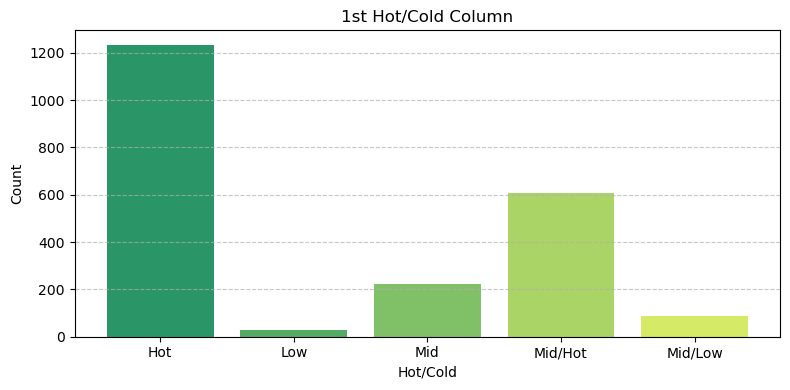

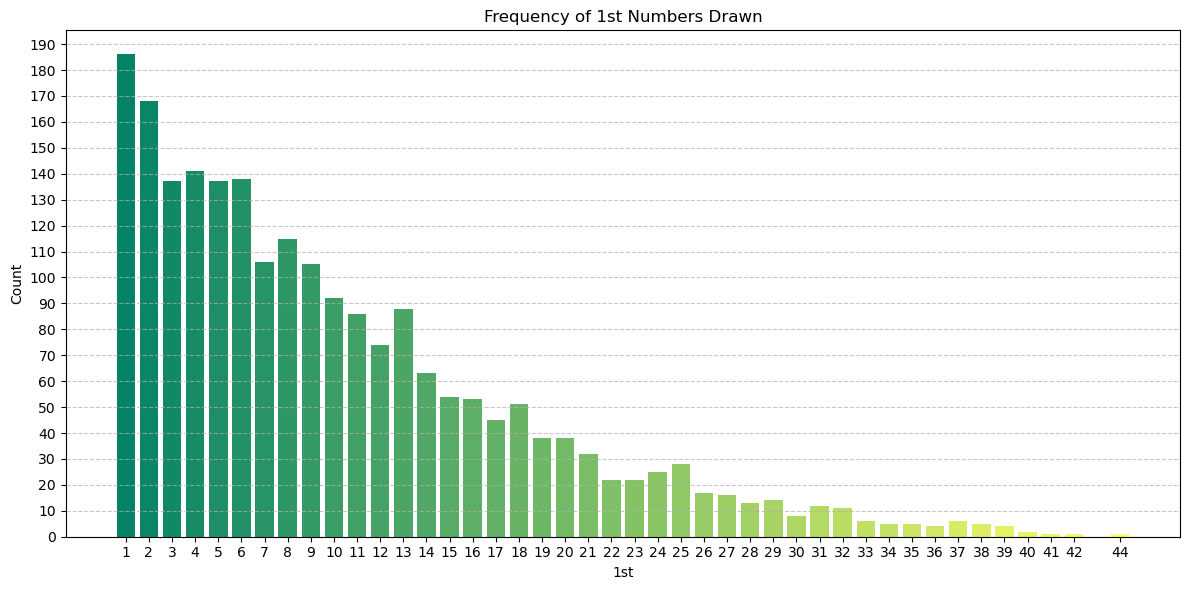


1st Category Breakdown:
Hot: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Mid/Hot: [10, 11, 12, 13, 14, 15, 16, 17, 18]
Mid: [19, 20, 21, 22, 23, 24, 25, 26]
Mid/Low: [27, 28, 29, 30, 31, 32, 33, 37]
Low: [34, 35, 36, 38, 39, 40, 41, 42, 44]
--------------------------------------------------


In [13]:
count_1st = data_HC_chart['1st_H/C'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count_1st))
plt.figure(figsize=(8, 4))

for i, (index, value) in enumerate(count_1st.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('Hot/Cold')
plt.ylabel('Count')
plt.title('1st Hot/Cold Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


count1st_values = data_HC['1st'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count1st_values))
plt.figure(figsize=(12, 6))

for i, (index, value) in enumerate(count1st_values.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('1st')
plt.ylabel('Count')
plt.xticks(count1st_values.index)
plt.yticks(range(0, int(count1st_values.max()) + 10, 10))
plt.title('Frequency of 1st Numbers Drawn') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

analyze_column(data_HC, '1st')  

In [14]:
# top 3 value counts for DataFrames 1st
combined = []

for name, df in dataframes.items():
    top_counts = df['1st'].value_counts().head(3)
    total_entries = len(df['1st'])
    top_percentages = (top_counts / total_entries) * 100

    freq_data = pd.DataFrame({
        'Number': top_counts.index,
        'Count': top_counts.values,
        'Percentage': top_percentages.values,
        'Dataset': name
    })
    combined.append(freq_data)

# Concatenate all results into a single DataFrame
final_table = pd.concat(combined, ignore_index=True)

# Create and populate PrettyTable
pretty = PrettyTable()
pretty.field_names = ["Dataset", "Number", "Count", "Percentage"]

for _, row in final_table.iterrows():
    pretty.add_row([row["Dataset"], row["Number"], row["Count"], f"{row['Percentage']:.2f}%"])
print('Top 3 Counts for 1st')
print(pretty)

Top 3 Counts for 1st
+---------------+--------+-------+------------+
|    Dataset    | Number | Count | Percentage |
+---------------+--------+-------+------------+
| data_complete |   1    |  186  |   8.55%    |
| data_complete |   2    |  168  |   7.72%    |
| data_complete |   4    |  141  |   6.48%    |
|    data_mon   |   1    |   40  |   9.35%    |
|    data_mon   |   4    |   30  |   7.01%    |
|    data_mon   |   2    |   27  |   6.31%    |
|   data_tues   |   3    |   28  |   9.18%    |
|   data_tues   |   6    |   25  |   8.20%    |
|   data_tues   |   1    |   24  |   7.87%    |
|    data_wed   |   2    |   29  |   9.51%    |
|    data_wed   |   1    |   27  |   8.85%    |
|    data_wed   |   3    |   24  |   7.87%    |
|   data_thur   |   1    |   43  |   10.05%   |
|   data_thur   |   6    |   36  |   8.41%    |
|   data_thur   |   5    |   31  |   7.24%    |
|    data_fri   |   2    |   21  |   6.89%    |
|    data_fri   |   5    |   18  |   5.90%    |
|    data_fri   |  

### <span style= "color:green;">**2nd Hot/Cold and Value Counts**</span>

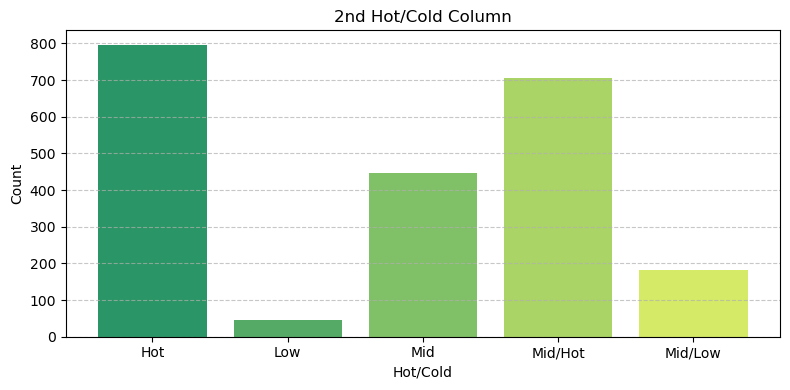

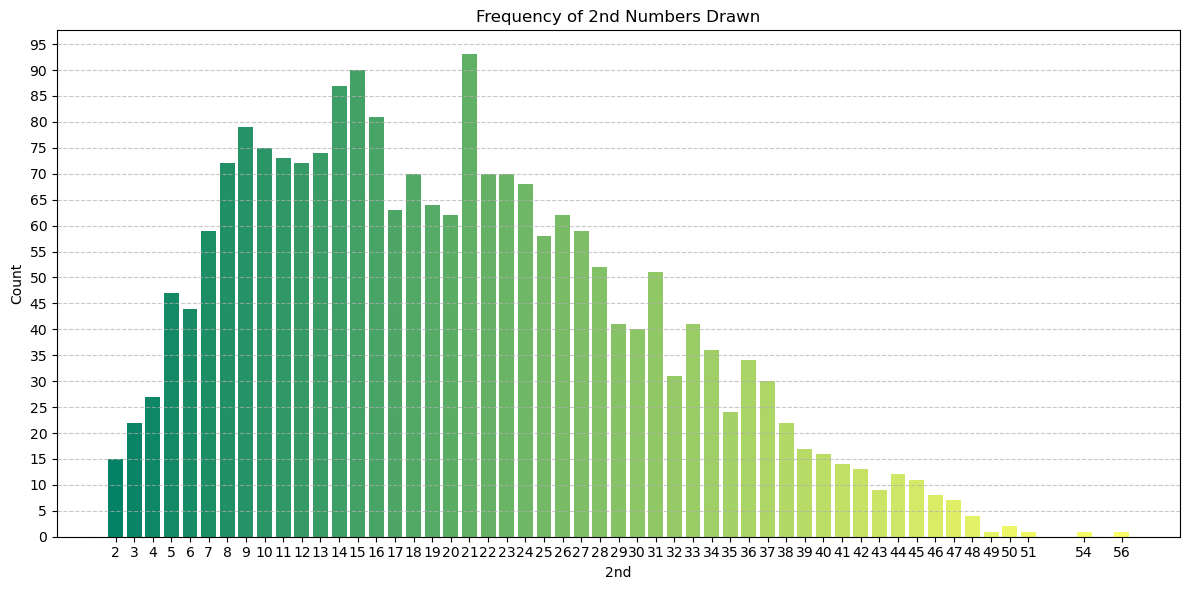


2nd Category Breakdown:
Hot: [8, 9, 10, 11, 12, 13, 14, 15, 16, 21]
Mid/Hot: [7, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27]
Mid: [5, 6, 28, 29, 30, 31, 32, 33, 34, 36, 37]
Mid/Low: [2, 3, 4, 35, 38, 39, 40, 41, 42, 44]
Low: [43, 45, 46, 47, 48, 49, 50, 51, 54, 56]
--------------------------------------------------


In [15]:
count_2nd = data_HC_chart['2nd_H/C'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count_2nd))
plt.figure(figsize=(8, 4))

for i, (index, value) in enumerate(count_2nd.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('Hot/Cold')
plt.ylabel('Count')
plt.title('2nd Hot/Cold Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


count2nd_values = data_HC['2nd'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count2nd_values))
plt.figure(figsize=(12, 6))

for i, (index, value) in enumerate(count2nd_values.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('2nd')
plt.ylabel('Count')
plt.xticks(count2nd_values.index)
plt.yticks(range(0, int(count2nd_values.max()) + 5, 5))
plt.title('Frequency of 2nd Numbers Drawn') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

analyze_column(data_HC, '2nd')

In [16]:
#top 3 value counts for the DataFrames 2nd
combined = []

for name, df in dataframes.items():
    top_counts = df['2nd'].value_counts().head(3)
    total_entries = len(df['2nd'])
    top_percentages = (top_counts / total_entries) * 100

    freq_data = pd.DataFrame({
        'Number': top_counts.index,
        'Count': top_counts.values,
        'Percentage': top_percentages.values,
        'Dataset': name
    })
    combined.append(freq_data)

# Concatenate all results into a single DataFrame
final_table = pd.concat(combined, ignore_index=True)

# Create and populate PrettyTable
pretty = PrettyTable()
pretty.field_names = ["Dataset", "Number", "Count", "Percentage"]

for _, row in final_table.iterrows():
    pretty.add_row([row["Dataset"], row["Number"], row["Count"], f"{row['Percentage']:.2f}%"])
print('Top 3 Counts for 2nd')
print(pretty)

Top 3 Counts for 2nd
+---------------+--------+-------+------------+
|    Dataset    | Number | Count | Percentage |
+---------------+--------+-------+------------+
| data_complete |   21   |   93  |   4.28%    |
| data_complete |   15   |   90  |   4.14%    |
| data_complete |   14   |   87  |   4.00%    |
|    data_mon   |   16   |   22  |   5.14%    |
|    data_mon   |   15   |   21  |   4.91%    |
|    data_mon   |   11   |   18  |   4.21%    |
|   data_tues   |   14   |   21  |   6.89%    |
|   data_tues   |   10   |   17  |   5.57%    |
|   data_tues   |   12   |   14  |   4.59%    |
|    data_wed   |   21   |   20  |   6.56%    |
|    data_wed   |   16   |   18  |   5.90%    |
|    data_wed   |   26   |   13  |   4.26%    |
|   data_thur   |   9    |   21  |   4.91%    |
|   data_thur   |   10   |   19  |   4.44%    |
|   data_thur   |   8    |   18  |   4.21%    |
|    data_fri   |   27   |   17  |   5.57%    |
|    data_fri   |   15   |   14  |   4.59%    |
|    data_fri   |  

### <span style= "color:green;">**3rd Hot/Cold and Value Counts**</span>

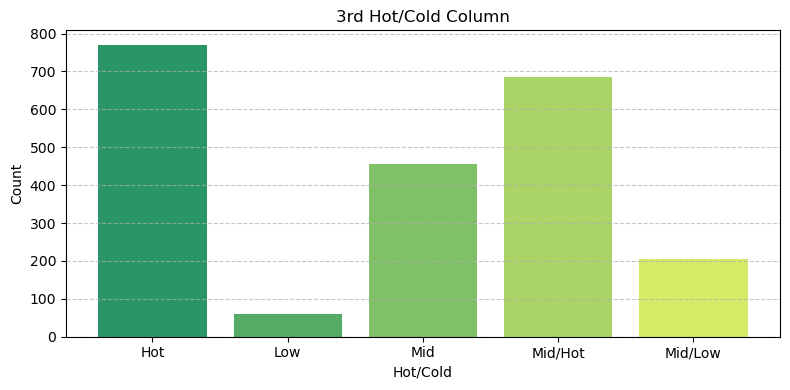

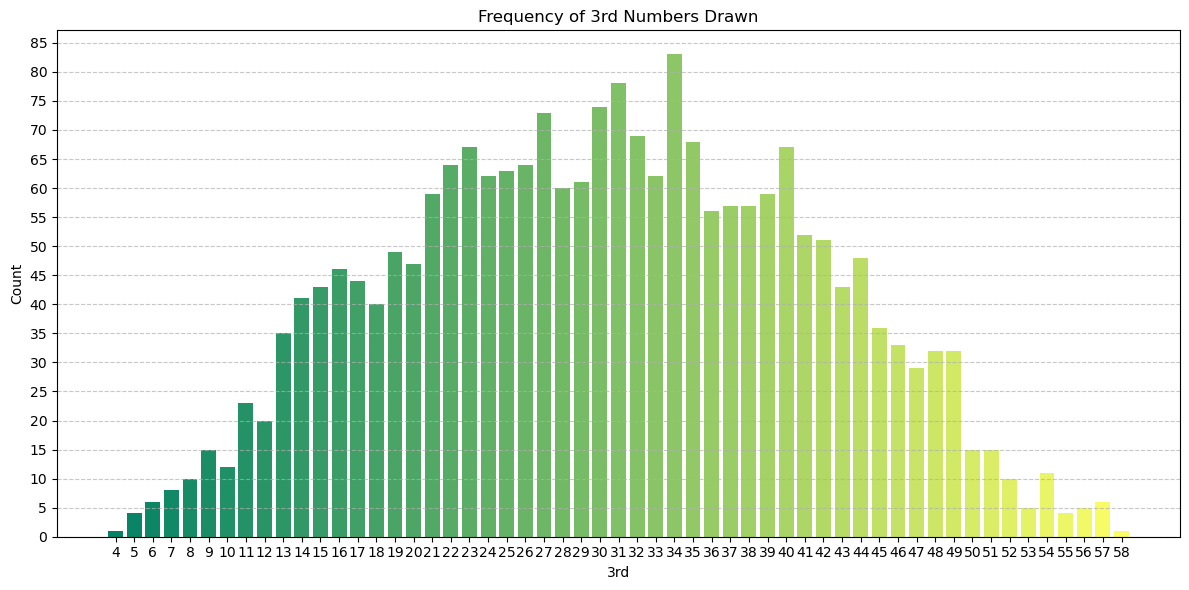


3rd Category Breakdown:
Hot: [22, 23, 25, 26, 27, 30, 31, 32, 34, 35, 40]
Mid/Hot: [19, 21, 24, 28, 29, 33, 36, 37, 38, 39, 41, 42]
Mid: [13, 14, 15, 16, 17, 18, 20, 43, 44, 45, 46]
Mid/Low: [9, 10, 11, 12, 47, 48, 49, 50, 51, 54]
Low: [4, 5, 6, 7, 8, 52, 53, 55, 56, 57, 58]
--------------------------------------------------


In [17]:
count_3rd = data_HC_chart['3rd_H/C'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count_3rd))
plt.figure(figsize=(8, 4))

for i, (index, value) in enumerate(count_3rd.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('Hot/Cold')
plt.ylabel('Count')
plt.title('3rd Hot/Cold Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


count3rd_values = data_HC['3rd'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count3rd_values))
plt.figure(figsize=(12, 6))

for i, (index, value) in enumerate(count3rd_values.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('3rd')
plt.ylabel('Count')
plt.xticks(count3rd_values.index)
plt.yticks(range(0, int(count3rd_values.max()) + 5, 5))
plt.title('Frequency of 3rd Numbers Drawn') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

analyze_column(data_HC, '3rd')

In [18]:
# top 3 value counts for DataFrames 3rd
combined = []

for name, df in dataframes.items():
    top_counts = df['3rd'].value_counts().head(3)
    total_entries = len(df['3rd'])
    top_percentages = (top_counts / total_entries) * 100

    freq_data = pd.DataFrame({
        'Number': top_counts.index,
        'Count': top_counts.values,
        'Percentage': top_percentages.values,
        'Dataset': name
    })
    combined.append(freq_data)

# Concatenate all results into a single DataFrame
final_table = pd.concat(combined, ignore_index=True)

# Create and populate PrettyTable
pretty = PrettyTable()
pretty.field_names = ["Dataset", "Number", "Count", "Percentage"]

for _, row in final_table.iterrows():
    pretty.add_row([row["Dataset"], row["Number"], row["Count"], f"{row['Percentage']:.2f}%"])
print('Top 3 Counts for 3rd')
print(pretty)

Top 3 Counts for 3rd
+---------------+--------+-------+------------+
|    Dataset    | Number | Count | Percentage |
+---------------+--------+-------+------------+
| data_complete |   34   |   83  |   3.82%    |
| data_complete |   31   |   78  |   3.59%    |
| data_complete |   30   |   74  |   3.40%    |
|    data_mon   |   31   |   18  |   4.21%    |
|    data_mon   |   33   |   18  |   4.21%    |
|    data_mon   |   35   |   17  |   3.97%    |
|   data_tues   |   30   |   17  |   5.57%    |
|   data_tues   |   27   |   16  |   5.25%    |
|   data_tues   |   26   |   15  |   4.92%    |
|    data_wed   |   29   |   18  |   5.90%    |
|    data_wed   |   39   |   11  |   3.61%    |
|    data_wed   |   22   |   11  |   3.61%    |
|   data_thur   |   32   |   19  |   4.44%    |
|   data_thur   |   40   |   17  |   3.97%    |
|   data_thur   |   30   |   17  |   3.97%    |
|    data_fri   |   23   |   14  |   4.59%    |
|    data_fri   |   40   |   13  |   4.26%    |
|    data_fri   |  

### <span style= "color:green;">**4th Hot/Cold and Value Counts**</span>

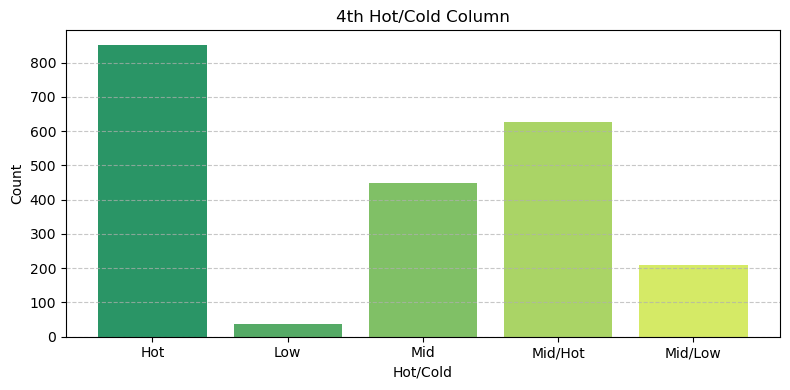

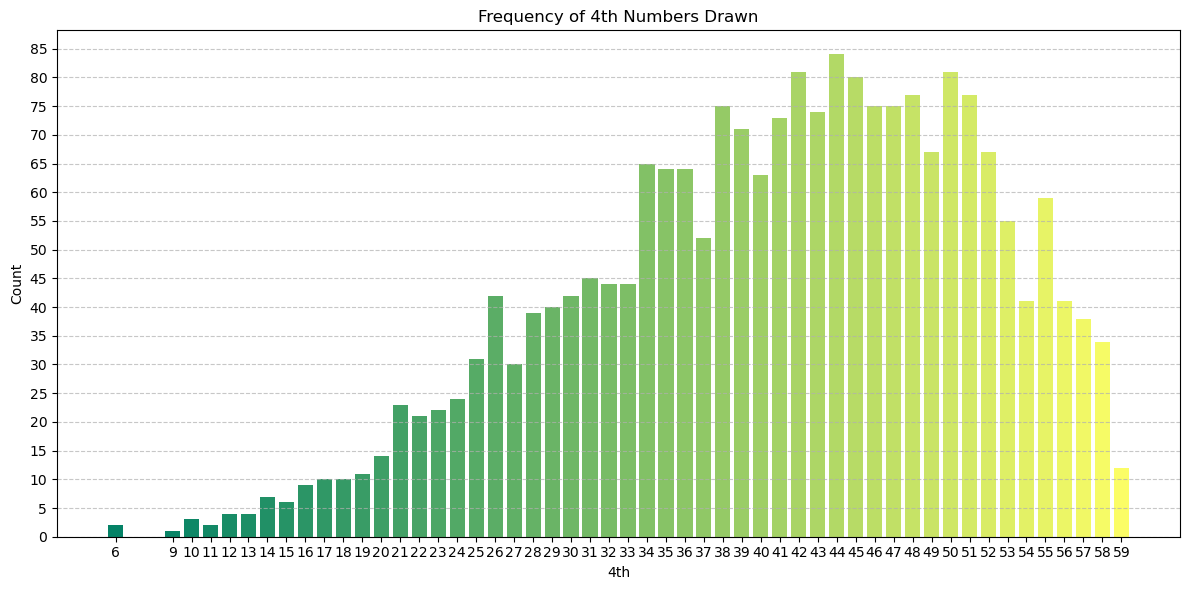


4th Category Breakdown:
Hot: [38, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51]
Mid/Hot: [34, 35, 36, 37, 39, 40, 49, 52, 53, 55]
Mid: [26, 28, 29, 30, 31, 32, 33, 54, 56, 57, 58]
Mid/Low: [17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 59]
Low: [6, 9, 10, 11, 12, 13, 14, 15, 16]
--------------------------------------------------


In [19]:
count_4th = data_HC_chart['4th_H/C'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count_4th))
plt.figure(figsize=(8, 4))

for i, (index, value) in enumerate(count_4th.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('Hot/Cold')
plt.ylabel('Count')
plt.title('4th Hot/Cold Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


count4th_values = data_HC['4th'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count4th_values))
plt.figure(figsize=(12, 6))

for i, (index, value) in enumerate(count4th_values.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('4th')
plt.ylabel('Count')
plt.xticks(count4th_values.index)
plt.yticks(range(0, int(count4th_values.max()) + 5, 5))
plt.title('Frequency of 4th Numbers Drawn') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

analyze_column(data_HC, '4th')

In [20]:
# top 3 value counts for DataFrames 4th
combined = []

for name, df in dataframes.items():
    top_counts = df['4th'].value_counts().head(3)
    total_entries = len(df['4th'])
    top_percentages = (top_counts / total_entries) * 100

    freq_data = pd.DataFrame({
        'Number': top_counts.index,
        'Count': top_counts.values,
        'Percentage': top_percentages.values,
        'Dataset': name
    })
    combined.append(freq_data)

# Concatenate all results into a single DataFrame
final_table = pd.concat(combined, ignore_index=True)

# Create and populate PrettyTable
pretty = PrettyTable()
pretty.field_names = ["Dataset", "Number", "Count", "Percentage"]

for _, row in final_table.iterrows():
    pretty.add_row([row["Dataset"], row["Number"], row["Count"], f"{row['Percentage']:.2f}%"])
print('Top 3 Counts for 4th')
print(pretty)

Top 3 Counts for 4th
+---------------+--------+-------+------------+
|    Dataset    | Number | Count | Percentage |
+---------------+--------+-------+------------+
| data_complete |   44   |   84  |   3.86%    |
| data_complete |   50   |   81  |   3.72%    |
| data_complete |   42   |   81  |   3.72%    |
|    data_mon   |   50   |   20  |   4.67%    |
|    data_mon   |   46   |   19  |   4.44%    |
|    data_mon   |   36   |   19  |   4.44%    |
|   data_tues   |   41   |   16  |   5.25%    |
|   data_tues   |   53   |   14  |   4.59%    |
|   data_tues   |   48   |   13  |   4.26%    |
|    data_wed   |   47   |   15  |   4.92%    |
|    data_wed   |   42   |   14  |   4.59%    |
|    data_wed   |   44   |   14  |   4.59%    |
|   data_thur   |   50   |   20  |   4.67%    |
|   data_thur   |   47   |   18  |   4.21%    |
|   data_thur   |   44   |   18  |   4.21%    |
|    data_fri   |   38   |   14  |   4.59%    |
|    data_fri   |   35   |   14  |   4.59%    |
|    data_fri   |  

### <span style= "color:green;">**5th Hot/Cold and Value Counts**</span>

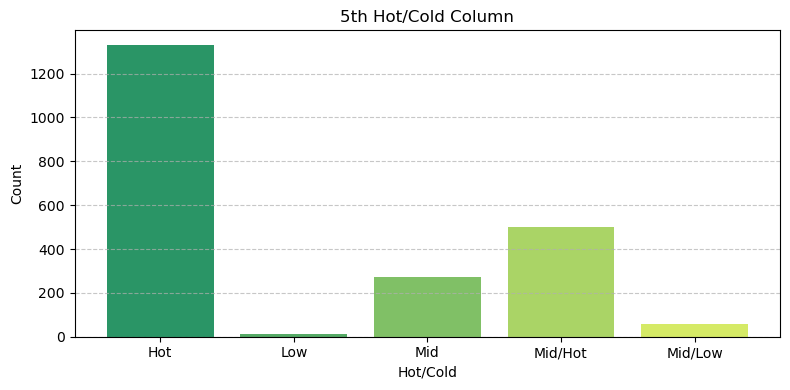

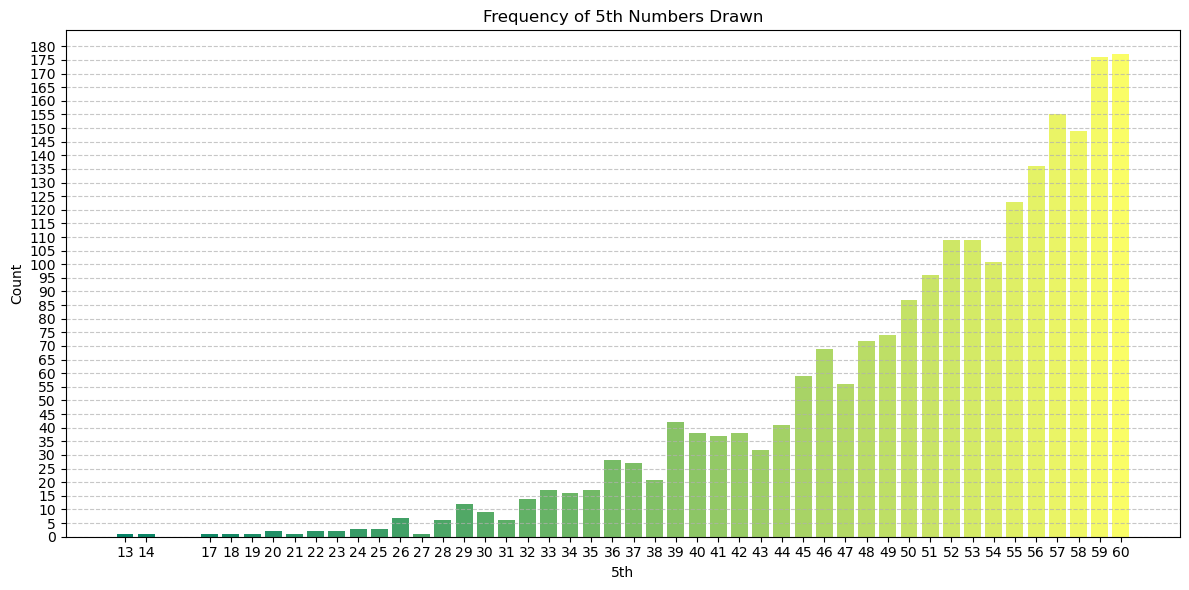


5th Category Breakdown:
Hot: [51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
Mid/Hot: [39, 44, 45, 46, 47, 48, 49, 50]
Mid: [33, 34, 35, 36, 37, 38, 40, 41, 42, 43]
Mid/Low: [24, 25, 26, 28, 29, 30, 31, 32]
Low: [13, 14, 17, 18, 19, 20, 21, 22, 23, 27]
--------------------------------------------------


In [21]:
count_5th = data_HC_chart['5th_H/C'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count_5th))
plt.figure(figsize=(8, 4))

for i, (index, value) in enumerate(count_5th.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('Hot/Cold')
plt.ylabel('Count')
plt.title('5th Hot/Cold Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


count5th_values = data_HC['5th'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count5th_values))
plt.figure(figsize=(12, 6))

for i, (index, value) in enumerate(count5th_values.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('5th')
plt.ylabel('Count')
plt.xticks(count5th_values.index)
plt.yticks(range(0, int(count5th_values.max()) + 5, 5))
plt.title('Frequency of 5th Numbers Drawn') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

analyze_column(data_HC, '5th')

In [22]:
# top 3 value counts for the DataFrames 5th
combined = []

for name, df in dataframes.items():
    top_counts = df['5th'].value_counts().head(3)
    total_entries = len(df['5th'])
    top_percentages = (top_counts / total_entries) * 100

    freq_data = pd.DataFrame({
        'Number': top_counts.index,
        'Count': top_counts.values,
        'Percentage': top_percentages.values,
        'Dataset': name
    })
    combined.append(freq_data)

# Concatenate all results into a single DataFrame
final_table = pd.concat(combined, ignore_index=True)

# Create and populate PrettyTable
pretty = PrettyTable()
pretty.field_names = ["Dataset", "Number", "Count", "Percentage"]

for _, row in final_table.iterrows():
    pretty.add_row([row["Dataset"], row["Number"], row["Count"], f"{row['Percentage']:.2f}%"])
print('Top 3 Counts for 5th')
print(pretty)

Top 3 Counts for 5th
+---------------+--------+-------+------------+
|    Dataset    | Number | Count | Percentage |
+---------------+--------+-------+------------+
| data_complete |   60   |  177  |   8.14%    |
| data_complete |   59   |  176  |   8.09%    |
| data_complete |   57   |  155  |   7.13%    |
|    data_mon   |   59   |   34  |   7.94%    |
|    data_mon   |   57   |   32  |   7.48%    |
|    data_mon   |   60   |   32  |   7.48%    |
|   data_tues   |   56   |   23  |   7.54%    |
|   data_tues   |   59   |   22  |   7.21%    |
|   data_tues   |   60   |   21  |   6.89%    |
|    data_wed   |   56   |   27  |   8.85%    |
|    data_wed   |   59   |   23  |   7.54%    |
|    data_wed   |   60   |   21  |   6.89%    |
|   data_thur   |   59   |   38  |   8.88%    |
|   data_thur   |   60   |   38  |   8.88%    |
|   data_thur   |   58   |   34  |   7.94%    |
|    data_fri   |   56   |   30  |   9.84%    |
|    data_fri   |   60   |   29  |   9.51%    |
|    data_fri   |  

### <span style= "color:green;">**Cash Ball Hot/Cold and Value Counts**</span>

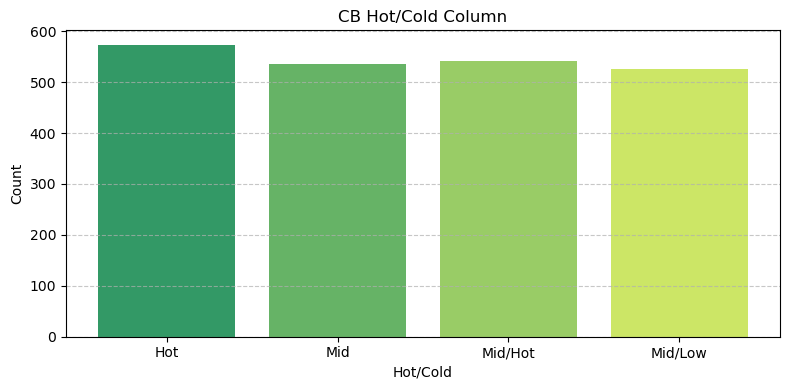

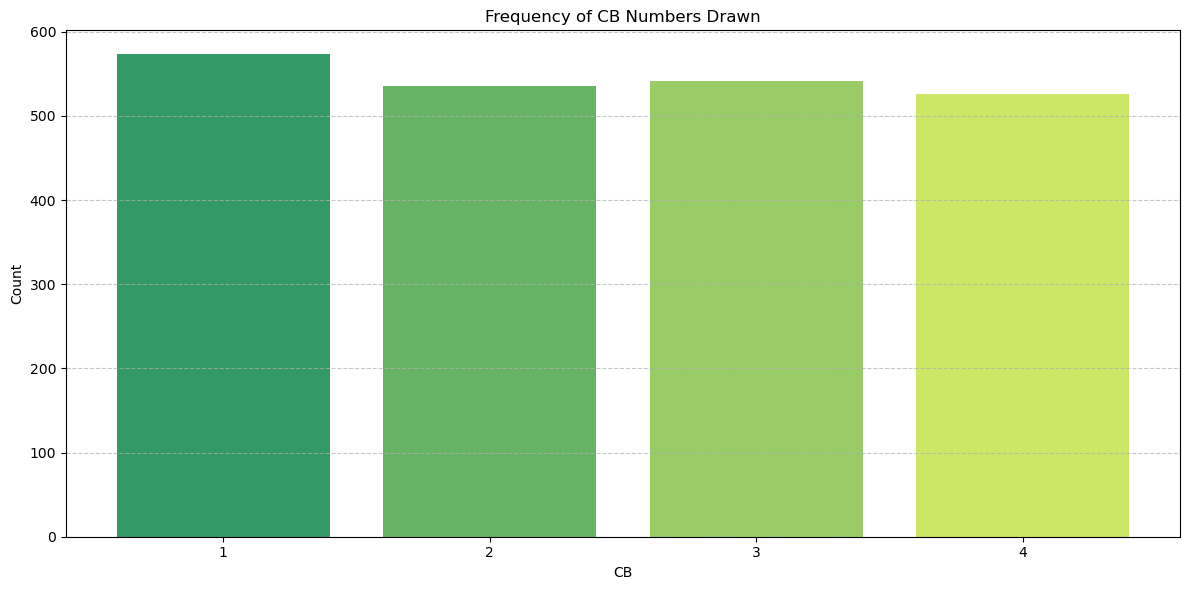


CB Category Breakdown:
Hot: [1]
Mid/Hot: [3]
Mid: [2]
Mid/Low: [4]
Low: []
--------------------------------------------------
Breakdown for Each Day's Cash Ball Number
 Number  Mon  Tues  Wed  Thur  Fri  Sat  Sun
      1  109    82   91   106   91   83   64
      2  102    66   64   113   78   70   85
      3  105    73   74   118   74   77   77
      4  112    84   76    91   62   74   78


In [23]:
#Hot/Cold
count_CB = data_HC_chart['CB_H/C'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(count_CB))
plt.figure(figsize=(8, 4))

for i, (index, value) in enumerate(count_CB.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('Hot/Cold')
plt.ylabel('Count')
plt.title('CB Hot/Cold Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Frequency
countCB_values = data_HC['CB'].value_counts().sort_index()
palette = sns.color_palette('summer', n_colors=len(countCB_values))
plt.figure(figsize=(12, 6))

for i, (index, value) in enumerate(countCB_values.items()):
    plt.bar(index, value, color=palette[i])

plt.xlabel('CB')
plt.ylabel('Count')
plt.xticks(countCB_values.index)
plt.title('Frequency of CB Numbers Drawn') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#CB breakdown
analyze_column(data_HC, 'CB')

dataframes = {
    'Mon': data_mon,
    'Tues': data_tues,
    'Wed': data_wed,
    'Thur': data_thur,
    'Fri': data_fri,
    'Sat': data_sat,
    'Sun': data_sun
}

#CB unique numbers
unique_numbers = sorted(data_mon['CB'].unique())

counts_data = {}

for number in unique_numbers:
    counts_data[number] = {}
    for day, data in dataframes.items():
        counts_data[number][day] = data['CB'].value_counts().get(number, 0)

table_data = []
for number in unique_numbers:
    row = [number] + [counts_data[number][day] for day in dataframes.keys()]
    table_data.append(row)

# Create the DataFrame
columns = ['Number'] + list(dataframes.keys())
data = pd.DataFrame(table_data, columns=columns)

print("Breakdown for Each Day's Cash Ball Number")
print(data.to_string(index=False))

### <span style= "color:green;">**Dataset Frequencies**</span>

In [24]:
number_columns = ['1st', '2nd', '3rd', '4th', '5th']
all_numbers = pd.concat([data_complete[col] for col in number_columns])

# Get counts
overall_freq = all_numbers.value_counts().sort_index()

# Get percentages (relative frequency)
overall_percent = all_numbers.value_counts(normalize=True).sort_index() * 100

# Combine into a DataFrame for a neat table
freq_data = pd.DataFrame({
    'Count': overall_freq,
    'Percentage': overall_percent
})

print(freq_data)

    Count  Percentage
1     186    1.710345
2     183    1.682759
3     159    1.462069
4     169    1.554023
5     188    1.728736
6     190    1.747126
7     173    1.590805
8     197    1.811494
9     200    1.839080
10    182    1.673563
11    184    1.691954
12    170    1.563218
13    202    1.857471
14    199    1.829885
15    193    1.774713
16    189    1.737931
17    163    1.498851
18    172    1.581609
19    163    1.498851
20    163    1.498851
21    208    1.912644
22    179    1.645977
23    183    1.682759
24    182    1.673563
25    183    1.682759
26    192    1.765517
27    179    1.645977
28    170    1.563218
29    168    1.544828
30    173    1.590805
31    192    1.765517
32    169    1.554023
33    170    1.563218
34    205    1.885057
35    178    1.636782
36    186    1.710345
37    172    1.581609
38    180    1.655172
39    193    1.774713
40    186    1.710345
41    177    1.627586
42    184    1.691954
43    158    1.452874
44    186    1.710345
45    186 

In [25]:
freq_data.max()

Count         208.000000
Percentage      1.912644
dtype: float64

In [26]:
from itertools import combinations

# Generate all pairs for each row and count them
# Most common for data_complete
pairs = data_complete[number_columns].apply(lambda row: list(combinations(row, 2)), axis=1)
all_pairs = pairs.explode()
pair_counts = all_pairs.value_counts()
print("Top 10 List of Most Common Pairs:")
print(pair_counts.head(10))  # Top 10 most common pairs

Top 10 List of Most Common Pairs:
(6, 36)     25
(27, 46)    24
(8, 34)     24
(9, 27)     23
(25, 57)    23
(34, 36)    22
(6, 21)     22
(13, 16)    22
(31, 39)    22
(13, 50)    22
Name: count, dtype: int64


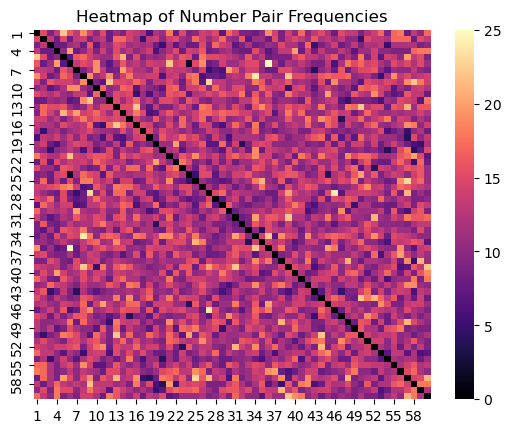

In [27]:
# Create a matrix for pair frequencies
pair_matrix = pd.DataFrame(0, index=range(1, 61), columns=range(1, 61))  # Adjust range as needed
for row in data_complete[number_columns].itertuples(index=False):
    for a, b in combinations(row, 2):
        pair_matrix.loc[a, b] += 1
        pair_matrix.loc[b, a] += 1  # Symmetric

sns.heatmap(pair_matrix, cmap='magma')
plt.title('Heatmap of Number Pair Frequencies')
plt.show()

In [28]:
#top pairs in data
dataframes = {
    'data_complete': data_complete,
    'data_mon': data_mon,
    'data_tues': data_tues,
    'data_wed': data_wed,
    'data_thur': data_thur,
    'data_fri': data_fri,
    'data_sat': data_sat,
    'data_sun': data_sun,
}

results = []

for name, df in dataframes.items():
    if df.empty:
        continue  # Skip empty df
    
    # Generate all number pairs for each row
    pairs = df[['1st', '2nd', '3rd', '4th', '5th']].apply(
        lambda row: list(combinations(row, 2)), 
        axis=1
    )
    
    # Explode pairs into individual rows and count occurrences
    all_pairs = pairs.explode()
    pair_counts = all_pairs.value_counts()
    total_rows = len(df)
    
    # Get top 5 pairs and calculate percentages
    top5_pairs = pair_counts.head(5)
    top5_percent = (top5_pairs / total_rows) * 100  # Percentage of rows containing the pair
    
    # Append results
    for pair, count in top5_pairs.items():
        results.append([
            name,                   # DataFrame name (e.g., "Mon M")
            pair,                   # Pair tuple (e.g., (3,5))
            count,                  # Absolute count
            round(top5_percent[pair], 2),  # Percentage
            total_rows              # Total rows in DataFrame
        ])

# Create final DataFrame
result_df = pd.DataFrame(
    results,
    columns=['DataFrame', 'Pair', 'Count', 'Percentage (%)', 'Total Rows']
)

os.makedirs('Combinations', exist_ok=True)

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
filename = f'Combinations/top_pairs_summary_{timestamp}.csv'

result_df.to_csv(filename, index=False)
print(result_df)

        DataFrame      Pair  Count  Percentage (%)  Total Rows
0   data_complete   (6, 36)     25            1.15        2175
1   data_complete  (27, 46)     24            1.10        2175
2   data_complete   (8, 34)     24            1.10        2175
3   data_complete   (9, 27)     23            1.06        2175
4   data_complete  (25, 57)     23            1.06        2175
5        data_mon    (1, 8)      8            1.87         428
6        data_mon  (20, 46)      8            1.87         428
7        data_mon   (8, 15)      8            1.87         428
8        data_mon   (1, 52)      8            1.87         428
9        data_mon  (26, 50)      8            1.87         428
10      data_tues  (30, 41)      7            2.30         305
11      data_tues  (14, 15)      6            1.97         305
12      data_tues  (10, 14)      6            1.97         305
13      data_tues  (10, 26)      6            1.97         305
14      data_tues   (8, 57)      6            1.97     

## Number Generation for Cash4Life

### <span style= "color:green;">**Game Play Numbers**</span>

**Best Transition**

In [29]:
class LotteryAnalyzer:
    def __init__(self, data_complete, name):
        self.data_complete = data_complete
        self.name = name
        self.data_complete_hot_cold = None
        self.transition_probs = {}
        self.hot_cold_probs = {}
        self.number_columns = ['1st', '2nd', '3rd', '4th', '5th', 'CB']
        self.valid_ranges = {
            "1st": (1, 56),
            "2nd": (2, 57),
            "3rd": (3, 58),
            "4th": (4, 59),
            "5th": (5, 60),
            "CB": (1, 4)
        }  

    def best_assign_HC(self):
        self.data_complete_hot_cold = self.data_complete.copy()
        for col in self.number_columns:
            self.data_complete_hot_cold[f'{col}_H/C'] = self._best_assign_HC_column(self.data_complete_hot_cold[col])

    def _best_assign_HC_column(self, series):
        counts = series.value_counts()
        percentiles = counts.rank(pct=True)
        return series.map(lambda x: 'Hot' if percentiles[x] >= 0.80 else ('Cold' if percentiles[x] <= 0.35 else 'Mid'))

    def calculate_transition_probs(self):
        for column in self.number_columns:
            self.transition_probs[column] = self._calculate_transition_prob(self.data_complete_hot_cold, column)
            self.hot_cold_probs[column] = self._calculate_transition_prob(self.data_complete_hot_cold, f'{column}_H/C')

    def _calculate_transition_prob(self, data_complete, column):
        transitions = data_complete[column].shift().groupby(data_complete[column]).value_counts(normalize=True).unstack()
        return transitions.fillna(0)

    def generate_gameplay_numbers(self):
        gameplay_numbers = []
        previous_number = None
        for column in self.number_columns[:-1]:  # Exclude CB
            best_transition = self._get_best_transition(self.hot_cold_probs[column], previous_number)
            selected_number = self._select_number(column, best_transition, gameplay_numbers)
            gameplay_numbers.append(selected_number)
            previous_number = best_transition
        
        cash_ball = self._select_cash_ball()
        gameplay_numbers.append(cash_ball)
        return gameplay_numbers

    def _get_best_transition(self, transition_matrix, previous_number=None):
        if isinstance(transition_matrix, pd.Series):
            return transition_matrix.idxmax()
        elif previous_number is None:
            return transition_matrix.mean().idxmax()
        else:
            return transition_matrix.loc[previous_number].idxmax()

    def _select_number(self, column, best_transition, gameplay_numbers):
        available_numbers = self.data_complete_hot_cold[
            (self.data_complete_hot_cold[f'{column}_H/C'] == best_transition) & 
            (self.data_complete_hot_cold[column] >= self.valid_ranges[column][0]) & 
            (self.data_complete_hot_cold[column] <= self.valid_ranges[column][1])
        ][column].unique()

        if len(available_numbers) == 0:
            available_numbers = list(range(self.valid_ranges[column][0], self.valid_ranges[column][1] + 1))

        valid_numbers = [n for n in available_numbers if n > (gameplay_numbers[-1] if gameplay_numbers else 0)]
        return random.choice(valid_numbers if valid_numbers else available_numbers)

    def _select_cash_ball(self):
        cash_ball_transition = self._get_best_transition(self.hot_cold_probs['CB'])
        cash_ball_numbers = self.data_complete_hot_cold[
            (self.data_complete_hot_cold['CB_H/C'] == cash_ball_transition) & 
            (self.data_complete_hot_cold['CB'] >= self.valid_ranges['CB'][0]) & 
            (self.data_complete_hot_cold['CB'] <= self.valid_ranges['CB'][1])
        ]['CB'].unique()

        if len(cash_ball_numbers) == 0:
            cash_ball_numbers = list(range(self.valid_ranges['CB'][0], self.valid_ranges['CB'][1] + 1))

        return random.choice(cash_ball_numbers)
    

In [30]:
analyzers = {}
for data_name, data in [
    ('Complete', data_complete),
    ('Monday', data_mon),
    ('Tuesday', data_tues),
    ('Wednesday', data_wed),
    ('Thursday', data_thur),
    ('Friday', data_fri),
    ('Saturday', data_sat),
    ('Sunday', data_sun)
]:
    analyzer = LotteryAnalyzer(data, data_name)
    analyzer.best_assign_HC()
    analyzer.calculate_transition_probs()
    analyzers[data_name] = analyzer

print("Best Transition Gameplay Numbers")
results = []
for name, analyzer in analyzers.items():
    gameplay_set = analyzer.generate_gameplay_numbers()
    clean_numbers = [int(x) for x in gameplay_set]
    print(f"{name}:", clean_numbers)
    # Add round number 1, dataset name, and the numbers
    results.append([1, name] + clean_numbers)

# Ensure the 'Predicted' directory exists
os.makedirs('Predicted', exist_ok=True)
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
filename = f'Predicted/best_cash4life_numbers_{timestamp}.csv'

with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Round', 'Dataset', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'CB'])
    writer.writerows(results)

print(f"\nSaved predictions to {filename}")

Best Transition Gameplay Numbers
Complete: [6, 37, 39, 52, 56, 2]
Monday: [13, 23, 38, 53, 58, 1]
Tuesday: [4, 15, 28, 48, 58, 1]
Wednesday: [10, 14, 17, 34, 59, 3]
Thursday: [5, 39, 45, 53, 60, 1]
Friday: [2, 33, 45, 57, 59, 2]
Saturday: [17, 25, 45, 54, 58, 4]
Sunday: [12, 26, 32, 36, 39, 4]

Saved predictions to Predicted/best_cash4life_numbers_20250504_1029.csv


In [31]:
print(f"Last Drawing Numbers")
print(data_complete.head(1))

Last Drawing Numbers
         Date     Day  1st  2nd  3rd  4th  5th  CB
0  05/02/2025  Friday    5   47   48   50   58   1


### <span style= "color:green;">**Game Play Numbers**</span>

**Worst Transition Numbers**

In [32]:
#worst case
class LotteryAnalyzer:
    def __init__(self, data_complete, name):
        self.data_complete = data_complete.copy()
        self.name = name
        self.transition_probs = {}
        self.hot_cold_probs = {}

    def worst_assign_HC(self):
        def worst_assign_HC(series):
            counts = series.value_counts()
            percentiles = counts.rank(pct=True)

            def label(x):
                pct = percentiles[x]
                if pct >= 0.85:
                    return 'Hot'
                elif pct <= 0.50:
                    return 'Cold'
                else:
                    return 'Mid'

            return series.map(label)

        number_columns = ['1st', '2nd', '3rd', '4th', '5th', 'CB']
        for col in number_columns:
            self.data_complete[f'{col}_H/C'] = worst_assign_HC(self.data_complete[col])

    def calculate_transition_probs(self):
        def calculate_transition_prob(data_complete, column):
            transitions = data_complete[column].shift().groupby(data_complete[column]).value_counts(normalize=True).unstack()
            return transitions.fillna(0)

        number_columns = ['1st', '2nd', '3rd', '4th', '5th', 'CB']

        for column in number_columns:
            self.transition_probs[column] = calculate_transition_prob(self.data_complete, column)
            hot_cold_column = f'{column}_H/C'
            self.hot_cold_probs[column] = calculate_transition_prob(self.data_complete, hot_cold_column)

    def get_worst_transition(self, transition_matrix, previous_number=None):
        if previous_number is None:
            return transition_matrix.mean().idxmin()
        else:
            return transition_matrix.loc[previous_number].idxmin()

    def generate_gameplay_numbers(self):
        valid_ranges = {
            "1st": (1, 56),
            "2nd": (2, 57),
            "3rd": (3, 58),
            "4th": (4, 59),
            "5th": (5, 60),
            "CB": (1, 4)
        }

        gameplay_numbers = []
        previous_number = None

        for column in ["1st", "2nd", "3rd", "4th", "5th"]:
            try:
                worst_transition = self.get_worst_transition(self.hot_cold_probs[column], previous_number)
            except KeyError:
                worst_transition = None

            available_numbers = []
            for transition in ['Hot', 'Mid', 'Cold']:
                numbers = self.data_complete[(self.data_complete[f'{column}_H/C'] == transition) & 
                                  (self.data_complete[column] >= valid_ranges[column][0]) & 
                                  (self.data_complete[column] <= valid_ranges[column][1])][column].unique()
                available_numbers.extend(numbers)

            if len(available_numbers) == 0:
                available_numbers = list(range(valid_ranges[column][0], valid_ranges[column][1] + 1))

            available_numbers = sorted(set(available_numbers))

            valid_numbers = [n for n in available_numbers if n > (gameplay_numbers[-1] if gameplay_numbers else 0)]
            if valid_numbers:
                selected_number = random.choice(valid_numbers)
            else:
                selected_number = random.choice(available_numbers)

            gameplay_numbers.append(selected_number)
            previous_number = worst_transition

        try:
            cash_ball_transition = self.get_worst_transition(self.hot_cold_probs['CB'])
            cash_ball_numbers = self.data_complete[(self.data_complete['CB_H/C'] == cash_ball_transition) & 
                                        (self.data_complete['CB'] >= valid_ranges['CB'][0]) & 
                                        (self.data_complete['CB'] <= valid_ranges['CB'][1])]['CB'].unique()
        except KeyError:
            cash_ball_numbers = self.data_complete[(self.data_complete['CB'] >= valid_ranges['CB'][0]) & 
                                        (self.data_complete['CB'] <= valid_ranges['CB'][1])]['CB'].unique()

        if len(cash_ball_numbers) == 0:
            cash_ball_numbers = list(range(valid_ranges['CB'][0], valid_ranges['CB'][1] + 1))

        cash_ball = random.choice(cash_ball_numbers)

        return gameplay_numbers + [cash_ball]


In [33]:
analyzers = {}
for data_name, data in [
    ('Complete', data_complete),
    ('Monday', data_mon),
    ('Tuesday', data_tues),
    ('Wednesday', data_wed),
    ('Thursday', data_thur),
    ('Friday', data_fri),
    ('Saturday', data_sat),
    ('Sunday', data_sun)
]:
    analyzer = LotteryAnalyzer(data, data_name)
    analyzer.worst_assign_HC()  # Changed to worst_assign_HC
    analyzer.calculate_transition_probs()
    analyzers[data_name] = analyzer

print("Worst Transition Gameplay Numbers")
results = []
for name, analyzer in analyzers.items():
    gameplay_set = analyzer.generate_gameplay_numbers()
    clean_numbers = [int(x) for x in gameplay_set]  # Clean numbers to integers
    print(f"{name}:", clean_numbers)
    results.append([1, name] + clean_numbers)  # Add round number + dataset + numbers

# Ensure the 'Predicted' directory exists
os.makedirs('Predicted', exist_ok=True)
timestamp = datetime.now().strftime('%Y%m%d_%H%M')
filename = f'Predicted/worst_cash4life_numbers_{timestamp}.csv'  # Changed to "worst"

with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Round', 'Dataset', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'CB'])
    writer.writerows(results)

print(f"Saved to {filename}")

Worst Transition Gameplay Numbers
Complete: [30, 37, 56, 58, 60, 3]
Monday: [30, 47, 52, 53, 54, 1]
Tuesday: [10, 15, 25, 26, 49, 1]
Wednesday: [37, 39, 43, 44, 48, 4]
Thursday: [27, 39, 51, 56, 59, 2]
Friday: [26, 41, 44, 59, 60, 2]
Saturday: [20, 41, 50, 53, 58, 3]
Sunday: [8, 26, 43, 51, 55, 4]
Saved to Predicted/worst_cash4life_numbers_20250504_1029.csv


In [34]:
print('Last Drawing Numbers')
print(data_complete.head(1))

Last Drawing Numbers
         Date     Day  1st  2nd  3rd  4th  5th  CB
0  05/02/2025  Friday    5   47   48   50   58   1


### <span style= "color:green;">**Game Play Numbers**</span>

**Random Transition**

In [35]:
class LotteryAnalyzer:
    def __init__(self, data_complete, name):
        self.data_complete = data_complete.copy()
        self.name = name

    def worst_assign_HC(self):
        def worst_assign_HC(series):
            counts = series.value_counts()
            percentiles = counts.rank(pct=True)
            def label(x):
                pct = percentiles[x]
                if pct >= 0.85:
                    return 'Hot'
                elif pct <= 0.50:
                    return 'Cold'
                else:
                    return 'Mid'
            return series.map(label)
        number_columns = ['1st', '2nd', '3rd', '4th', '5th', 'CB']
        for col in number_columns:
            self.data_complete[f'{col}_H/C'] = worst_assign_HC(self.data_complete[col])

    def generate_gameplay_numbers_random_category(self):
        valid_ranges = {
            "1st": (1, 56),
            "2nd": (2, 57),
            "3rd": (3, 58),
            "4th": (4, 59),
            "5th": (5, 60),
            "CB": (1, 4)
        }
        categories = ['Hot', 'Mid', 'Cold']
        gameplay_numbers = []
        for i, column in enumerate(["1st", "2nd", "3rd", "4th", "5th"]):
            chosen_category = random.choice(categories)
            numbers_in_category = self.data_complete[
                (self.data_complete[f'{column}_H/C'] == chosen_category) &
                (self.data_complete[column] >= valid_ranges[column][0]) &
                (self.data_complete[column] <= valid_ranges[column][1])
            ][column].unique()
            if len(numbers_in_category) == 0:
                numbers_in_category = list(range(valid_ranges[column][0], valid_ranges[column][1] + 1))
            # Enforce ascending order
            valid_numbers = [n for n in numbers_in_category if n > (gameplay_numbers[-1] if gameplay_numbers else 0)]
            selected_number = random.choice(valid_numbers) if valid_numbers else random.choice(numbers_in_category)
            gameplay_numbers.append(selected_number)
        # Handle CB independently
        chosen_category_cb = random.choice(categories)
        cb_numbers = self.data_complete[
            (self.data_complete['CB_H/C'] == chosen_category_cb) &
            (self.data_complete['CB'] >= valid_ranges['CB'][0]) &
            (self.data_complete['CB'] <= valid_ranges['CB'][1])
        ]['CB'].unique()
        cash_ball = random.choice(cb_numbers) if len(cb_numbers) > 0 else random.randint(*valid_ranges['CB'])
        return gameplay_numbers + [cash_ball]

In [36]:
dataframes = [
    ('Complete', data_complete),
    ('Monday', data_mon),    
    ('Tuesday', data_tues),
    ('Wednesday', data_wed), 
    ('Thursday', data_thur), 
    ('Friday', data_fri),
    ('Saturday', data_sat),
    ('Sunday', data_sun)
]

analyzers = {}

for data_name, data in dataframes:
    analyzer = LotteryAnalyzer(data, data_name)
    analyzer.worst_assign_HC()  # You can use best_assign_HC() if you prefer
    analyzers[data_name] = analyzer

print("Random Category Gameplay Numbers")
results = []
for name, analyzer in analyzers.items():
    gameplay_set = analyzer.generate_gameplay_numbers_random_category()
    clean_numbers = [int(x) for x in gameplay_set]
    print(f"{name}:", clean_numbers)
    results.append([1, name] + clean_numbers)

# Ensure the 'Predicted' directory exists
os.makedirs('Predicted', exist_ok=True)

# Get current datetime and format as string
now = datetime.now()
datestamp = now.strftime('%Y%m%d_%H%M')
filename = f'Predicted/random_cash4life_numbers_{datestamp}.csv'

# Save to CSV
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Round', 'Dataset', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'CB'])
    writer.writerows(results)

print(f"Saved to {filename}")

Random Category Gameplay Numbers
Complete: [22, 36, 41, 47, 38, 3]
Monday: [16, 26, 28, 30, 34, 4]
Tuesday: [1, 29, 32, 58, 35, 4]
Wednesday: [3, 10, 11, 53, 29, 4]
Thursday: [16, 22, 48, 51, 56, 1]
Friday: [7, 28, 41, 59, 60, 2]
Saturday: [5, 29, 47, 54, 24, 4]
Sunday: [9, 40, 46, 54, 58, 2]
Saved to Predicted/random_cash4life_numbers_20250504_1029.csv


In [37]:
print('Last Drawing Numbers')
print(data_complete.head(1))

Last Drawing Numbers
         Date     Day  1st  2nd  3rd  4th  5th  CB
0  05/02/2025  Friday    5   47   48   50   58   1
